In [23]:
# Import the yfinance module and alias it as yf
import yfinance as yf

# Create a Ticker object for Tesla with the ticker symbol "TSLA"
tesla = yf.Ticker("TSLA")

# Use the history method to get historical data for the Tesla stock, covering the maximum available period
tesla_data = tesla.history(period="max")

# Reset the index of the dataframe to make the Date column a regular column, then display the first five rows of the dataframe
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for the Tesla revenue page and use the requests module to retrieve HTML data from the page
tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_html_data = requests.get(tesla_url).text

# Use BeautifulSoup to parse the HTML data
tesla_soup = BeautifulSoup(tesla_html_data, "html5lib")

# Find all tables in the HTML and loop through to find the one containing Tesla quarterly revenue data
tesla_tables = tesla_soup.find_all('table')

for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index

# Create an empty dataframe to store the revenue data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through the rows of the revenue table and extract the date and revenue information
for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        # Append the extracted date and revenue to the tesla_revenue dataframe
        tesla_revenue = tesla_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

# Remove any rows where the revenue value is empty or missing
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last five rows of the tesla_revenue dataframe using the tail() function
tesla_revenue.tail()

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


In [13]:
# Define the ticker symbol for GameStop using yfinance
gamestop = yf.Ticker("GME")

# Retrieve the historical data for GameStop using the history() function with the "max" period
gme_data = gamestop.history(period="max")

# Reset the index of the gme_data dataframe to make the Date column a regular column, and display the first five rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [17]:
# Define the URL for the GameStop revenue page and use requests module to retrieve HTML data from the page
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_html_data = requests.get(gme_url).text

# Use BeautifulSoup to parse the HTML data
gme_soup = BeautifulSoup(gme_html_data, "html5lib")

# Find all tables in the HTML and loop through to find the one containing GameStop quarterly revenue data
gme_tables = gme_soup.find_all('table')

for index,table in enumerate(gme_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_table_index = index

# Create an empty dataframe to store the revenue data
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through the rows of the revenue table and extract the date and revenue information
for row in gme_tables[gme_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

#Display the last five rows of the gme_revenue dataframe
gme_revenue.tail()

,Date,Revenue
51,2010-01-31,3524
52,2009-10-31,1835
53,2009-07-31,1739
54,2009-04-30,1981
55,2009-01-31,3492


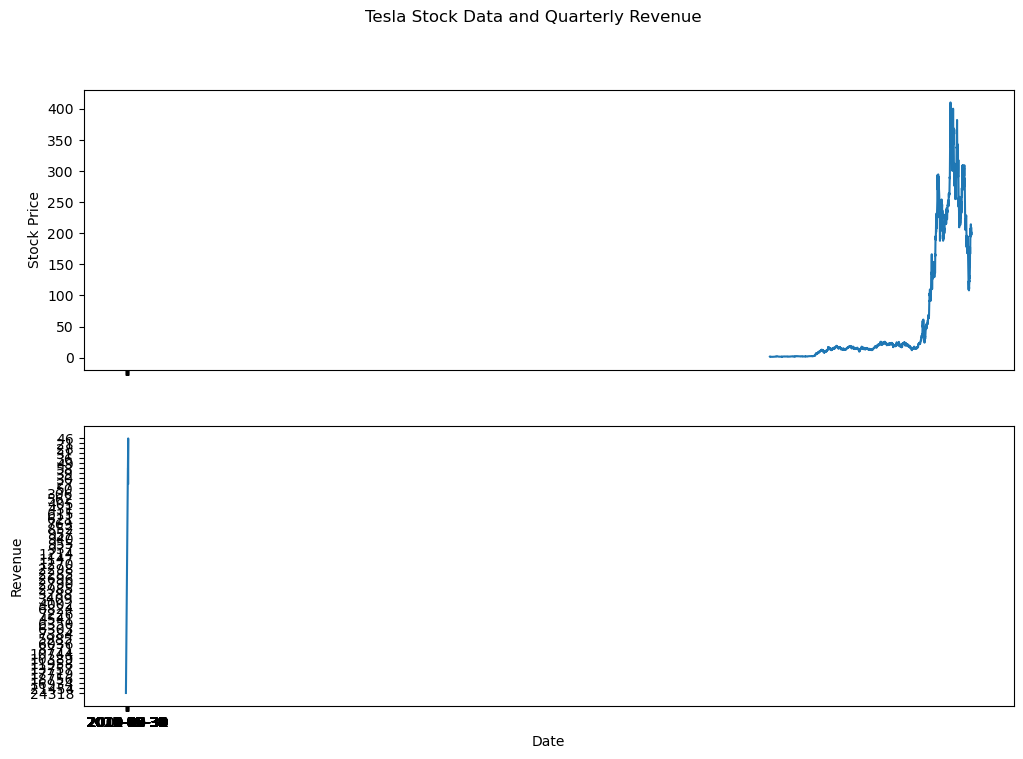

In [21]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
    fig.suptitle(stock_name + ' Stock Data and Quarterly Revenue')
    
# Plot stock data
    axs[0].plot(stock_data['Date'], stock_data['Close'])
    axs[0].set_ylabel('Stock Price')
    
# Plot revenue data
    axs[1].plot(revenue_data['Date'], revenue_data['Revenue'])
    axs[1].set_ylabel('Revenue')
    axs[1].set_xlabel('Date')
    
    plt.show()
    
# Call the function make_graph with Tesla stock data and revenue data, and a string 'Tesla' as the title
make_graph(tesla_data, tesla_revenue, 'Tesla')

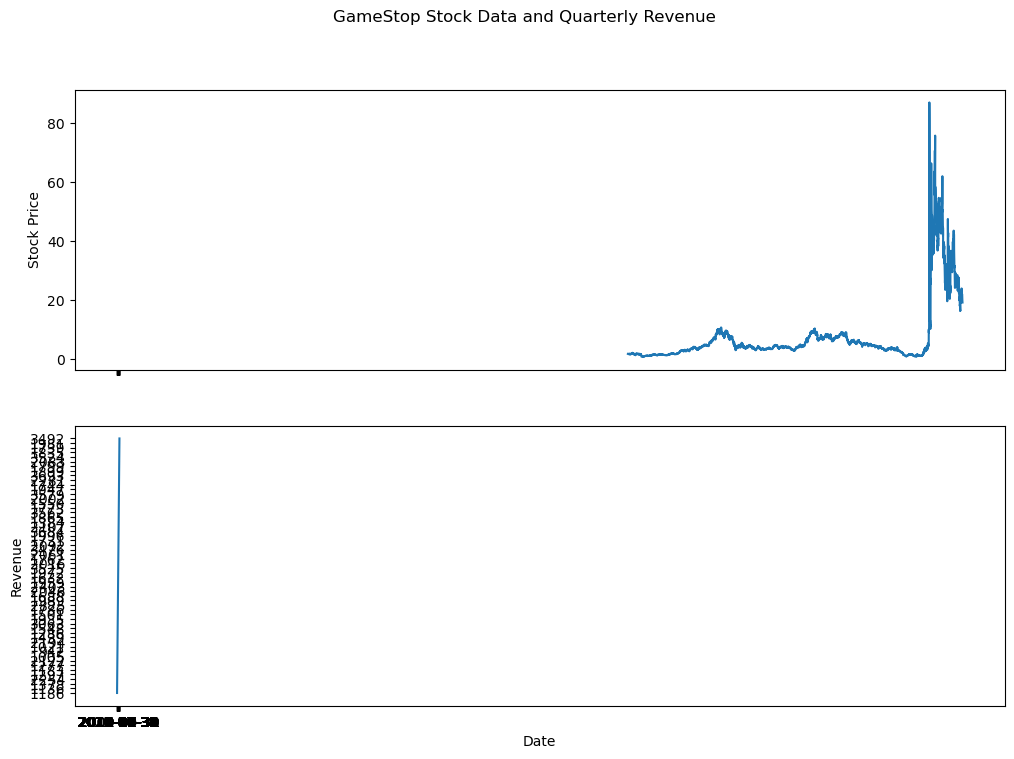

In [24]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
    fig.suptitle(stock_name + ' Stock Data and Quarterly Revenue')
    
# Plot stock data
    axs[0].plot(stock_data['Date'], stock_data['Close'])
    axs[0].set_ylabel('Stock Price')
    
# Plot revenue data
    axs[1].plot(revenue_data['Date'], revenue_data['Revenue'])
    axs[1].set_ylabel('Revenue')
    axs[1].set_xlabel('Date')
    
    plt.show()
    
# Call the function make_graph with GameStop stock data and revenue data, and a string 'GameStop' as the title
make_graph(gme_data, gme_revenue, 'GameStop')